<a href="https://www.pieriandata.com"><img src="../Pierian_Data_Logo.PNG"></a>
<strong><center>Copyright by Pierian Data Inc.</center></strong> 
<strong><center>Created by Jose Marcial Portilla.</center></strong>

# Keras API Project Exercise

## The Data

We will be using a subset of the LendingClub DataSet obtained from Kaggle: https://www.kaggle.com/wordsforthewise/lending-club

## NOTE: Do not download the full zip from the link! We provide a special version of this file that has some extra feature engineering for you to do. You won't be able to follow along with the original file!

LendingClub is a US peer-to-peer lending company, headquartered in San Francisco, California.[3] It was the first peer-to-peer lender to register its offerings as securities with the Securities and Exchange Commission (SEC), and to offer loan trading on a secondary market. LendingClub is the world's largest peer-to-peer lending platform.

### Our Goal

Given historical data on loans given out with information on whether or not the borrower defaulted (charge-off), can we build a model thatcan predict wether or nor a borrower will pay back their loan? This way in the future when we get a new potential customer we can assess whether or not they are likely to pay back the loan. Keep in mind classification metrics when evaluating the performance of your model!

The "loan_status" column contains our label.

### Data Overview

----
-----
There are many LendingClub data sets on Kaggle. Here is the information on this particular data set:

<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>LoanStatNew</th>
      <th>Description</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>0</th>
      <td>loan_amnt</td>
      <td>The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.</td>
    </tr>
    <tr>
      <th>1</th>
      <td>term</td>
      <td>The number of payments on the loan. Values are in months and can be either 36 or 60.</td>
    </tr>
    <tr>
      <th>2</th>
      <td>int_rate</td>
      <td>Interest Rate on the loan</td>
    </tr>
    <tr>
      <th>3</th>
      <td>installment</td>
      <td>The monthly payment owed by the borrower if the loan originates.</td>
    </tr>
    <tr>
      <th>4</th>
      <td>grade</td>
      <td>LC assigned loan grade</td>
    </tr>
    <tr>
      <th>5</th>
      <td>sub_grade</td>
      <td>LC assigned loan subgrade</td>
    </tr>
    <tr>
      <th>6</th>
      <td>emp_title</td>
      <td>The job title supplied by the Borrower when applying for the loan.*</td>
    </tr>
    <tr>
      <th>7</th>
      <td>emp_length</td>
      <td>Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years.</td>
    </tr>
    <tr>
      <th>8</th>
      <td>home_ownership</td>
      <td>The home ownership status provided by the borrower during registration or obtained from the credit report. Our values are: RENT, OWN, MORTGAGE, OTHER</td>
    </tr>
    <tr>
      <th>9</th>
      <td>annual_inc</td>
      <td>The self-reported annual income provided by the borrower during registration.</td>
    </tr>
    <tr>
      <th>10</th>
      <td>verification_status</td>
      <td>Indicates if income was verified by LC, not verified, or if the income source was verified</td>
    </tr>
    <tr>
      <th>11</th>
      <td>issue_d</td>
      <td>The month which the loan was funded</td>
    </tr>
    <tr>
      <th>12</th>
      <td>loan_status</td>
      <td>Current status of the loan</td>
    </tr>
    <tr>
      <th>13</th>
      <td>purpose</td>
      <td>A category provided by the borrower for the loan request.</td>
    </tr>
    <tr>
      <th>14</th>
      <td>title</td>
      <td>The loan title provided by the borrower</td>
    </tr>
    <tr>
      <th>15</th>
      <td>zip_code</td>
      <td>The first 3 numbers of the zip code provided by the borrower in the loan application.</td>
    </tr>
    <tr>
      <th>16</th>
      <td>addr_state</td>
      <td>The state provided by the borrower in the loan application</td>
    </tr>
    <tr>
      <th>17</th>
      <td>dti</td>
      <td>A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LC loan, divided by the borrower’s self-reported monthly income.</td>
    </tr>
    <tr>
      <th>18</th>
      <td>earliest_cr_line</td>
      <td>The month the borrower's earliest reported credit line was opened</td>
    </tr>
    <tr>
      <th>19</th>
      <td>open_acc</td>
      <td>The number of open credit lines in the borrower's credit file.</td>
    </tr>
    <tr>
      <th>20</th>
      <td>pub_rec</td>
      <td>Number of derogatory public records</td>
    </tr>
    <tr>
      <th>21</th>
      <td>revol_bal</td>
      <td>Total credit revolving balance</td>
    </tr>
    <tr>
      <th>22</th>
      <td>revol_util</td>
      <td>Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.</td>
    </tr>
    <tr>
      <th>23</th>
      <td>total_acc</td>
      <td>The total number of credit lines currently in the borrower's credit file</td>
    </tr>
    <tr>
      <th>24</th>
      <td>initial_list_status</td>
      <td>The initial listing status of the loan. Possible values are – W, F</td>
    </tr>
    <tr>
      <th>25</th>
      <td>application_type</td>
      <td>Indicates whether the loan is an individual application or a joint application with two co-borrowers</td>
    </tr>
    <tr>
      <th>26</th>
      <td>mort_acc</td>
      <td>Number of mortgage accounts.</td>
    </tr>
    <tr>
      <th>27</th>
      <td>pub_rec_bankruptcies</td>
      <td>Number of public record bankruptcies</td>
    </tr>
  </tbody>
</table>

---
----

## Starter Code

#### Note: We also provide feature information on the data as a .csv file for easy lookup throughout the notebook:

In [8]:
from __future__ import absolute_import, division, print_function, unicode_literals
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout

print(tf.__version__)

print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))

print(tf.test.is_gpu_available())
print(tf.test.is_built_with_cuda())

2.0.0
Num GPUs Available:  1
True
True


In [9]:
! pip install pandas
! pip install numpy
! pip install matplotlib
! pip install seaborn


import pandas as pd

In [10]:
data_info = pd.read_csv('../DATA/lending_club_info.csv',index_col='LoanStatNew')

In [11]:
print(data_info.loc['revol_util']['Description'])

Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.


In [12]:
data_info.head()

,Description
LoanStatNew,
loan_amnt,The listed amount of the loan applied for by t...
term,The number of payments on the loan. Values are...
int_rate,Interest Rate on the loan
installment,The monthly payment owed by the borrower if th...
grade,LC assigned loan grade


In [13]:
def feat_info(col_name):
    print(data_info.loc[col_name]['Description'])

In [14]:
feat_info('mort_acc')

Number of mortgage accounts.


## Loading the data and other imports

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# might be needed depending on your version of Jupyter
%matplotlib inline

In [16]:
df = pd.read_csv('../DATA/lending_club_loan_two.csv')

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
loan_amnt               396030 non-null float64
term                    396030 non-null object
int_rate                396030 non-null float64
installment             396030 non-null float64
grade                   396030 non-null object
sub_grade               396030 non-null object
emp_title               373103 non-null object
emp_length              377729 non-null object
home_ownership          396030 non-null object
annual_inc              396030 non-null float64
verification_status     396030 non-null object
issue_d                 396030 non-null object
loan_status             396030 non-null object
purpose                 396030 non-null object
title                   394275 non-null object
dti                     396030 non-null float64
earliest_cr_line        396030 non-null object
open_acc                396030 non-null float64
pub_rec                 396030 non-nu

In [18]:
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\r\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113"
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,...,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\r\nDelacruzside, MA 00813"
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,...,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\r\nGreggshire, VA 11650"


# Project Tasks

**Complete the tasks below! Keep in mind is usually more than one way to complete the task! Enjoy**

-----
------

# Section 1: Exploratory Data Analysis

**OVERALL GOAL: Get an understanding for which variables are important, view summary statistics, and visualize the data**


----

**TASK: Since we will be attempting to predict loan_status, create a countplot as shown below.**

Counter({'Fully Paid': 318357, 'Charged Off': 77673})


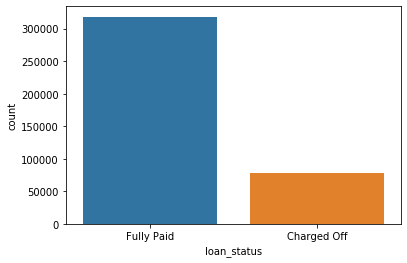

In [19]:
# CODE HERE
import collections as col
print(col.Counter(df['loan_status']))
sns.countplot(df['loan_status'])


**TASK: Create a histogram of the loan_amnt column.**

In [20]:
# CODE HERE

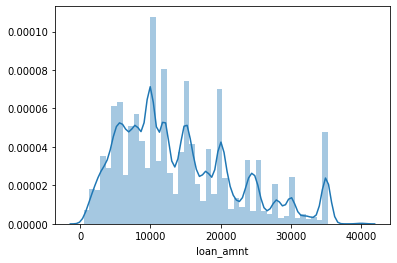

In [21]:
sns.distplot(df['loan_amnt'])

**TASK: Let's explore correlation between the continuous feature variables. Calculate the correlation between all continuous numeric variables using .corr() method.**

In [22]:
# CODE HERE

In [23]:
print(df.corr()['loan_amnt'].sort_values(ascending=False))

loan_amnt               1.000000
installment             0.953929
annual_inc              0.336887
revol_bal               0.328320
total_acc               0.223886
mort_acc                0.222315
open_acc                0.198556
int_rate                0.168921
revol_util              0.099911
dti                     0.016636
pub_rec                -0.077779
pub_rec_bankruptcies   -0.106539
Name: loan_amnt, dtype: float64


**TASK: Visualize this using a heatmap. Depending on your version of matplotlib, you may need to manually adjust the heatmap.**

* [Heatmap info](https://seaborn.pydata.org/generated/seaborn.heatmap.html#seaborn.heatmap)
* [Help with resizing](https://stackoverflow.com/questions/56942670/matplotlib-seaborn-first-and-last-row-cut-in-half-of-heatmap-plot)

In [24]:
# CODE HERE

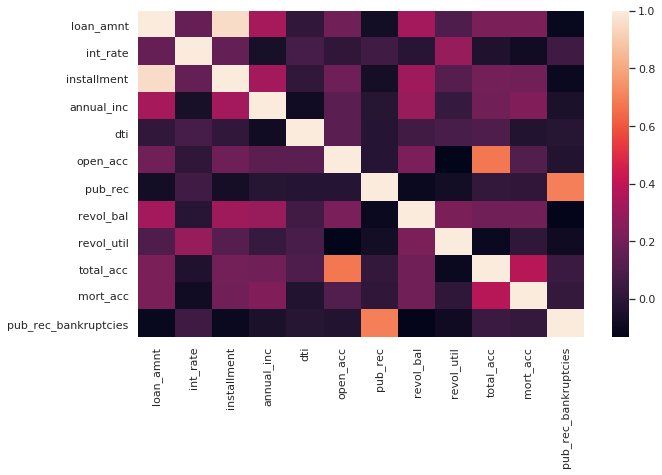

In [25]:
#cmap = sns.diverging_palette(220, 10, as_cmap=True)
plt.figure(figsize=(10,6))
sns.set(style="white")
sns.heatmap(df.corr())

**TASK: You should have noticed almost perfect correlation with the "installment" feature. Explore this feature further. Print out their descriptions and perform a scatterplot between them. Does this relationship make sense to you? Do you think there is duplicate information here?**

In [26]:
# CODE HERE

In [27]:
print('loan_amt: ' + data_info.loc['loan_amnt']['Description'])
print(' ')
print('installment: ' + data_info.loc['installment']['Description'])

loan_amt: The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.
 
installment: The monthly payment owed by the borrower if the loan originates.


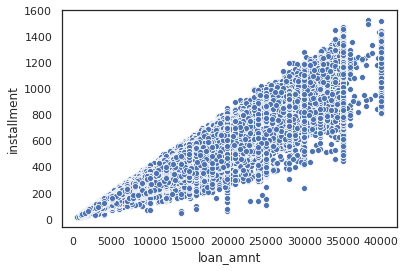

In [28]:
sns.scatterplot(df['loan_amnt'], df['installment'])
#sns.regplot(x='loan_amnt', y='installment', data=df, cm)


**TASK: Create a boxplot showing the relationship between the loan_status and the Loan Amount.**

In [29]:
# CODE HERE

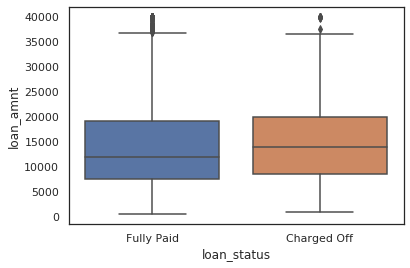

In [30]:
sns.boxplot(x="loan_status", y="loan_amnt", data=df)

**TASK: Calculate the summary statistics for the loan amount, grouped by the loan_status.**

In [31]:
# CODE HERE

In [32]:
pd.set_option('display.precision', 2)
df.groupby(['loan_status'])['loan_amnt'].describe().transpose()

loan_status,Charged Off,Fully Paid
count,77673.00,318357.00
mean,15126.30,13866.88
std,8505.09,8302.32
min,1000.00,500.00
25%,8525.00,7500.00
50%,14000.00,12000.00
75%,20000.00,19225.00
max,40000.00,40000.00


**TASK: Let's explore the Grade and SubGrade columns that LendingClub attributes to the loans. What are the unique possible grades and subgrades?**

In [33]:
# CODE HERE

In [34]:
print(df['grade'].value_counts())


B    116018
C    105987
A     64187
D     63524
E     31488
F     11772
G      3054
Name: grade, dtype: int64


In [35]:
print(df['sub_grade'].value_counts())

B3    26655
B4    25601
C1    23662
C2    22580
B2    22495
B5    22085
C3    21221
C4    20280
B1    19182
A5    18526
C5    18244
D1    15993
A4    15789
D2    13951
D3    12223
D4    11657
A3    10576
A1     9729
D5     9700
A2     9567
E1     7917
E2     7431
E3     6207
E4     5361
E5     4572
F1     3536
F2     2766
F3     2286
F4     1787
F5     1397
G1     1058
G2      754
G3      552
G4      374
G5      316
Name: sub_grade, dtype: int64


**TASK: Create a countplot per grade. Set the hue to the loan_status label.**

In [36]:
# CODE HERE

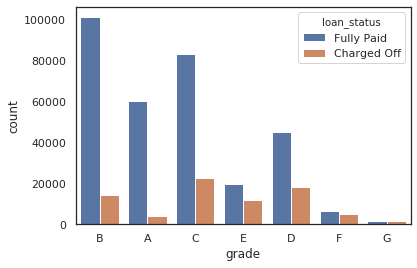

In [37]:
sns.countplot(df['grade'], hue=df['loan_status'])

**TASK: Display a count plot per subgrade. You may need to resize for this plot and [reorder](https://seaborn.pydata.org/generated/seaborn.countplot.html#seaborn.countplot) the x axis. Feel free to edit the color palette. Explore both all loans made per subgrade as well being separated based on the loan_status. After creating this plot, go ahead and create a similar plot, but set hue="loan_status"**

In [38]:
#CODE HERE

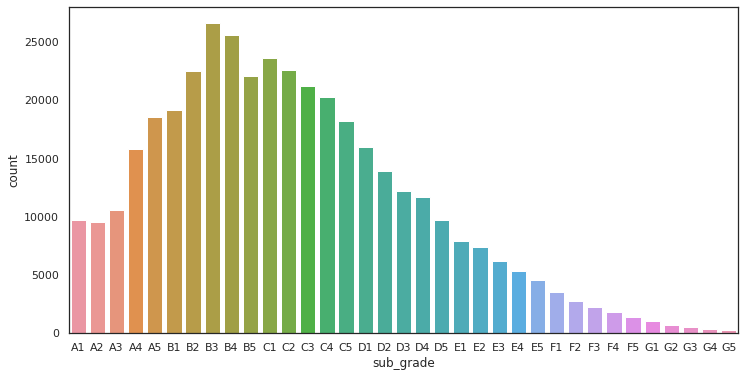

In [39]:
plt.figure(figsize=(12,6))
df_sorted = df.sort_values(['sub_grade'])
sns.countplot(x='sub_grade', data=df_sorted)

In [40]:
# CODE HERE

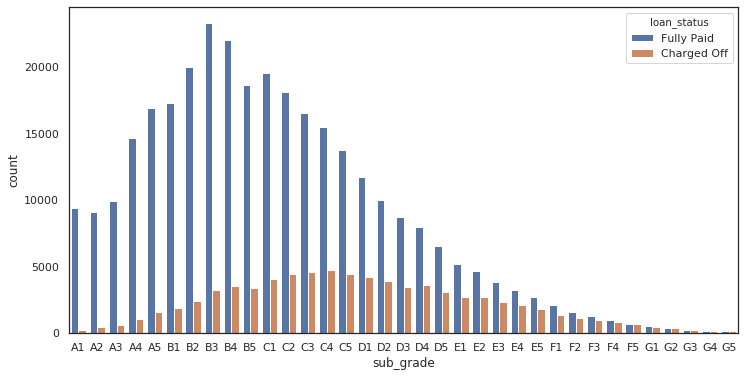

In [41]:
plt.figure(figsize=(12,6))
df_sorted = df.sort_values(['sub_grade'])
sns.countplot(x='sub_grade', data=df_sorted, hue='loan_status')

**TASK: It looks like F and G subgrades don't get paid back that often. Isloate those and recreate the countplot just for those subgrades.**

In [42]:
# CODE HERE

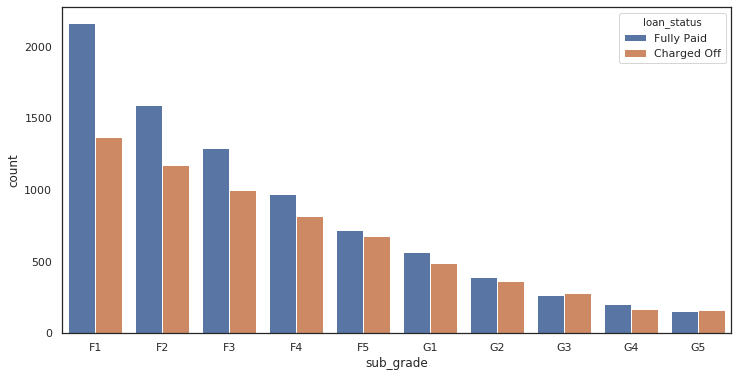

In [43]:
def subs(data):
    return data[:1] in ['F', 'G']
    
plt.figure(figsize=(12,6))
df_sorted = df.sort_values(['sub_grade'])
df_sorted = df_sorted[df_sorted['sub_grade'].apply(subs)] 
sns.countplot(x='sub_grade', data=df_sorted, hue='loan_status')

**TASK: Create a new column called 'loan_repaid' which will contain a 1 if the loan status was "Fully Paid" and a 0 if it was "Charged Off".**

In [44]:
# CODE HERE

In [45]:
df['loan_repaid'] = df['loan_status'].map(lambda x: 1 if x == 'Fully Paid' else 0)

**CHALLENGE TASK: (Note this is hard, but can be done in one line!) Create a bar plot showing the correlation of the numeric features to the new loan_repaid column. [Helpful Link](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.bar.html)**

In [46]:
#CODE HERE

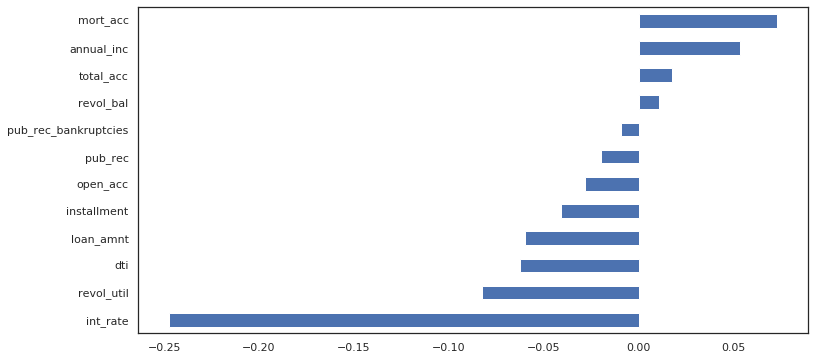

In [47]:
plt.figure(figsize=(12,6))
corr = df.corr()['loan_repaid']
corr = corr.drop(['loan_repaid'])
corr = corr.sort_values(ascending=True)
corr.plot.barh()


---
---
# Section 2: Data PreProcessing

**Section Goals: Remove or fill any missing data. Remove unnecessary or repetitive features. Convert categorical string features to dummy variables.**



# Missing Data

**Let's explore this missing data columns. We use a variety of factors to decide whether or not they would be useful, to see if we should keep, discard, or fill in the missing data.**

**TASK: What is the length of the dataframe?**

In [48]:
# CODE HERE

In [49]:
print('1')
len(df)

1


396030

**TASK: Create a Series that displays the total count of missing values per column.**

In [50]:
# CODE HERE

In [51]:
for key, value in df.isnull().sum().iteritems():
    if value > 0:
        print("{}: {}".format(key, value))

emp_title: 22927
emp_length: 18301
title: 1755
revol_util: 276
mort_acc: 37795
pub_rec_bankruptcies: 535


**TASK: Convert this Series to be in term of percentage of the total DataFrame**

In [52]:
# CODE HERE

In [53]:
not_null = len(df.dropna())
is_null = len(df) - not_null
(not_null - is_null) / len(df)

0.6961745322324067

**TASK: Let's examine emp_title and emp_length to see whether it will be okay to drop them. Print out their feature information using the feat_info() function from the top of this notebook.**

In [54]:
# CODE HERE

In [55]:
feat_info('emp_title')
feat_info('emp_length')

The job title supplied by the Borrower when applying for the loan.*
Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years. 


**TASK: How many unique employment job titles are there?**

In [56]:
# CODE HERE

In [57]:
df['emp_title'].value_counts()

Teacher                           4389
Manager                           4250
Registered Nurse                  1856
RN                                1846
Supervisor                        1830
                                  ... 
St. Thomas More Parish School        1
Business Manager/:Public Works       1
advanced fabrication                 1
Proprietor/Owner                     1
Pre-Press Manager                    1
Name: emp_title, Length: 173105, dtype: int64

**TASK: Realistically there are too many unique job titles to try to convert this to a dummy variable feature. Let's remove that emp_title column.**

In [58]:
# CODE HERE

In [59]:
data = df.drop(['emp_title'], axis=1)

**TASK: Create a count plot of the emp_length feature column. Challenge: Sort the order of the values.**

In [60]:
# CODE HERE
def map_emp_length(emp_length):
    return { 
        '10+ years': 10,
        '9 years': 9,
        '8 years': 8,
        '7 years': 7,
        '6 years': 6,
        '5 years': 5,
        '4 years': 4,
        '3 years': 3,
        '2 years': 2,
        '1 year': 1,
        '< 1 year': 0
    }[emp_length]

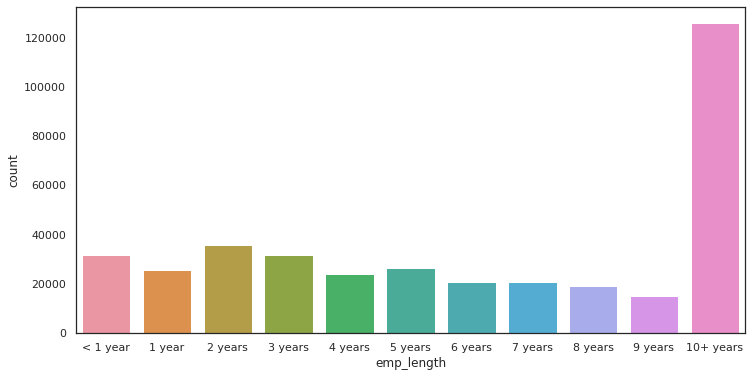

In [61]:
plt.figure(figsize=(12,6))
data = data.dropna(subset=['emp_length']) #data[data['emp_length'].notnull()]
data['mapped_emp_length'] = data['emp_length'].apply(map_emp_length)
data = data.sort_values(['mapped_emp_length'])
sns.countplot(data['emp_length'])

**TASK: Plot out the countplot with a hue separating Fully Paid vs Charged Off**

In [62]:
# CODE HERE

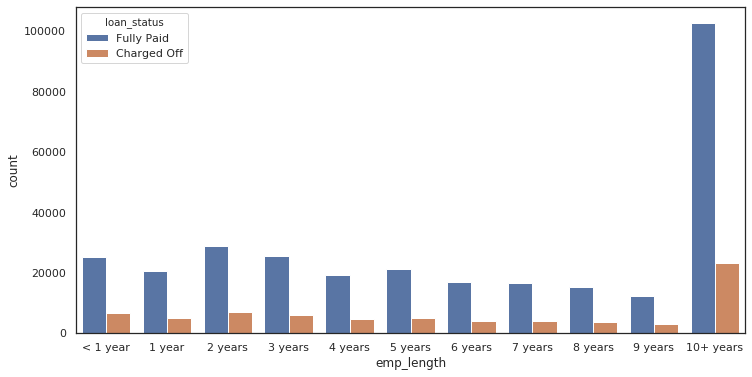

In [63]:
plt.figure(figsize=(12,6))
data = data[data['emp_length'].notnull()]
data['mapped_emp_length'] = data['emp_length'].apply(map_emp_length)
data = data.sort_values(['mapped_emp_length'])
sns.countplot(data['emp_length'], hue=data['loan_status'])

**CHALLENGE TASK: This still doesn't really inform us if there is a strong relationship between employment length and being charged off, what we want is the percentage of charge offs per category. Essentially informing us what percent of people per employment category didn't pay back their loan. There are a multitude of ways to create this Series. Once you've created it, see if visualize it with a [bar plot](https://pandas.pydata.org/pandas-docs/version/0.23.4/generated/pandas.DataFrame.plot.html). This may be tricky, refer to solutions if you get stuck on creating this Series.**

In [64]:
# CODE HERE

/home/mattiasliljenzin/anaconda3/envs/tensorflow/lib/python3.7/site-packages/pandas/core/computation/expressions.py:194: UserWarning: evaluating in Python space because the '+' operator is not supported by numexpr for the bool dtype, use '|' instead
  op=op_str, alt_op=unsupported[op_str]


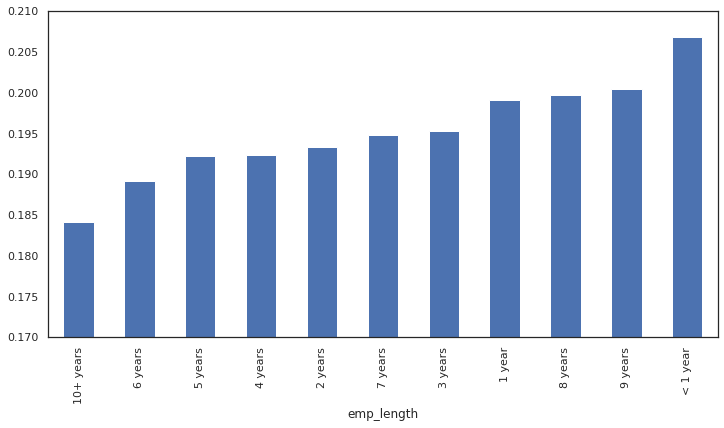

In [65]:
plt.figure(figsize=(12,6))
plt.ylim(bottom=0.17, top=0.21)

data['loan_repaid_true'] = data['loan_repaid'] == 1
data['loan_repaid_false'] = data['loan_repaid'] == 0
data['count'] = data['loan_repaid_true'] + data['loan_repaid_false']
grouped = data.groupby(['emp_length']).sum()
grouped['loan_repaid_false_percent'] = grouped['loan_repaid_false'] / grouped['count']
grouped = grouped.sort_values(['loan_repaid_false_percent'])
grouped['loan_repaid_false_percent'].plot(kind='bar', )


**TASK: Charge off rates are extremely similar across all employment lengths. Go ahead and drop the emp_length column.**

In [66]:
# CODE HERE

In [67]:
data = data.drop('emp_length', axis=1)

**TASK: Revisit the DataFrame to see what feature columns still have missing data.**

In [68]:
data.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1541
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                265
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                36739
pub_rec_bankruptcies      535
address                     0
loan_repaid                 0
mapped_emp_length           0
loan_repaid_true            0
loan_repaid_false           0
count                       0
dtype: int64

**TASK: Review the title column vs the purpose column. Is this repeated information?**

In [69]:
# CODE HERE

In [70]:
df[['purpose', 'title']].head(10)

,purpose,title
0,vacation,Vacation
1,debt_consolidation,Debt consolidation
2,credit_card,Credit card refinancing
3,credit_card,Credit card refinancing
4,credit_card,Credit Card Refinance
5,debt_consolidation,Debt consolidation
6,home_improvement,Home improvement
7,credit_card,No More Credit Cards
8,debt_consolidation,Debt consolidation
9,debt_consolidation,Debt Consolidation


In [71]:
df['title'].head(10)

0                   Vacation
1         Debt consolidation
2    Credit card refinancing
3    Credit card refinancing
4      Credit Card Refinance
5         Debt consolidation
6           Home improvement
7       No More Credit Cards
8         Debt consolidation
9         Debt Consolidation
Name: title, dtype: object

**TASK: The title column is simply a string subcategory/description of the purpose column. Go ahead and drop the title column.**

In [72]:
# CODE HERE

In [73]:
data = data.drop('title', axis=1)

---
**NOTE: This is one of the hardest parts of the project! Refer to the solutions video if you need guidance, feel free to fill or drop the missing values of the mort_acc however you see fit! Here we're going with a very specific approach.**


---
**TASK: Find out what the mort_acc feature represents**

In [74]:
# CODE HERE

In [75]:
feat_info('mort_acc')

Number of mortgage accounts.


**TASK: Create a value_counts of the mort_acc column.**

In [76]:
# CODE HERE

In [77]:
data['mort_acc'].value_counts()

0.0     133378
1.0      57859
2.0      47580
3.0      35994
4.0      26374
5.0      17185
6.0      10450
7.0       5687
8.0       2964
9.0       1565
10.0       820
11.0       449
12.0       247
13.0       136
14.0       104
15.0        60
16.0        36
17.0        21
18.0        17
19.0        14
20.0        12
24.0         9
22.0         7
25.0         4
21.0         4
27.0         3
26.0         2
23.0         2
32.0         2
31.0         2
30.0         1
34.0         1
28.0         1
Name: mort_acc, dtype: int64

**TASK: There are many ways we could deal with this missing data. We could attempt to build a simple model to fill it in, such as a linear model, we could just fill it in based on the mean of the other columns, or you could even bin the columns into categories and then set NaN as its own category. There is no 100% correct approach! Let's review the other columsn to see which most highly correlates to mort_acc**

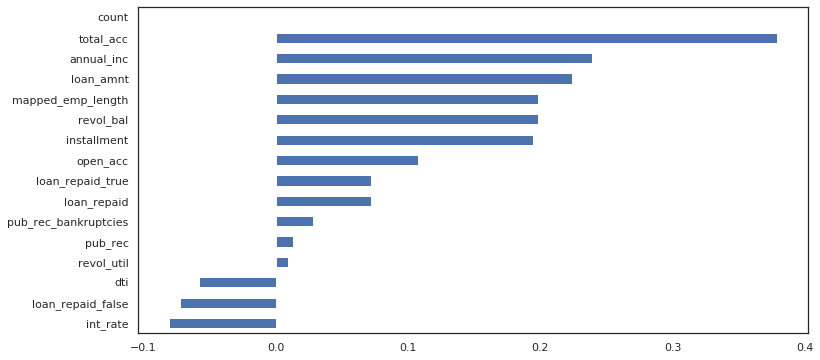

In [78]:
plt.figure(figsize=(12,6))
data.corr()['mort_acc'].sort_values().drop('mort_acc').plot(kind='barh')

In [79]:
feat_info('total_acc')

The total number of credit lines currently in the borrower's credit file


**TASK: Looks like the total_acc feature correlates with the mort_acc , this makes sense! Let's try this fillna() approach. We will group the dataframe by the total_acc and calculate the mean value for the mort_acc per total_acc entry. To get the result below:**

In [80]:
mort_acc = data.groupby('total_acc').mean()['mort_acc']
data['mort_acc_avg'] = data['total_acc'].map(mort_acc)
data['mort_acc'] = data['mort_acc'].fillna(data['mort_acc_avg'])
data.isnull().sum()


loan_amnt                 0
term                      0
int_rate                  0
installment               0
grade                     0
sub_grade                 0
home_ownership            0
annual_inc                0
verification_status       0
issue_d                   0
loan_status               0
purpose                   0
dti                       0
earliest_cr_line          0
open_acc                  0
pub_rec                   0
revol_bal                 0
revol_util              265
total_acc                 0
initial_list_status       0
application_type          0
mort_acc                  0
pub_rec_bankruptcies    535
address                   0
loan_repaid               0
mapped_emp_length         0
loan_repaid_true          0
loan_repaid_false         0
count                     0
mort_acc_avg              0
dtype: int64

**CHALLENGE TASK: Let's fill in the missing mort_acc values based on their total_acc value. If the mort_acc is missing, then we will fill in that missing value with the mean value corresponding to its total_acc value from the Series we created above. This involves using an .apply() method with two columns. Check out the link below for more info, or review the solutions video/notebook.**

[Helpful Link](https://stackoverflow.com/questions/13331698/how-to-apply-a-function-to-two-columns-of-pandas-dataframe) 

In [81]:
# CODE HERE

**TASK: revol_util and the pub_rec_bankruptcies have missing data points, but they account for less than 0.5% of the total data. Go ahead and remove the rows that are missing those values in those columns with dropna().**

In [82]:
# CODE HERE

In [83]:
data = data.drop(['pub_rec_bankruptcies', 'revol_util'], axis=1)

## Categorical Variables and Dummy Variables

**We're done working with the missing data! Now we just need to deal with the string values due to the categorical columns.**

**TASK: List all the columns that are currently non-numeric. [Helpful Link](https://stackoverflow.com/questions/22470690/get-list-of-pandas-dataframe-columns-based-on-data-type)**

[Another very useful method call](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.select_dtypes.html)

In [84]:
# CODE HERE

In [85]:
data.select_dtypes(include='object')

,term,grade,sub_grade,home_ownership,verification_status,issue_d,loan_status,purpose,earliest_cr_line,initial_list_status,application_type,address
265913,60 months,D,D5,RENT,Verified,Jul-2012,Fully Paid,debt_consolidation,Feb-1999,f,INDIVIDUAL,"7573 Hawkins Radial\r\nChristopherborough, CT ..."
144620,36 months,C,C4,OWN,Not Verified,Aug-2013,Charged Off,debt_consolidation,Feb-2000,f,INDIVIDUAL,"6015 Tyler Unions\r\nSharonbury, MT 93700"
338746,36 months,A,A4,RENT,Not Verified,Jun-2014,Fully Paid,credit_card,Oct-1996,w,INDIVIDUAL,"699 Lee Neck\r\nNorth Felicialand, AL 70466"
176669,36 months,C,C2,MORTGAGE,Verified,May-2015,Fully Paid,debt_consolidation,Dec-2001,f,INDIVIDUAL,204 Victoria Prairie Apt. 614\r\nNorth Carolyn...
372932,36 months,C,C5,RENT,Source Verified,Jan-2015,Fully Paid,debt_consolidation,Aug-2009,f,INDIVIDUAL,"7453 Fisher Ford\r\nDodsonfurt, LA 00813"
...,...,...,...,...,...,...,...,...,...,...,...,...
85124,36 months,A,A2,MORTGAGE,Not Verified,Sep-2011,Fully Paid,car,Jun-2000,f,INDIVIDUAL,"58862 Jeffery Lake\r\nLake Adam, MA 29597"
85123,60 months,D,D1,MORTGAGE,Verified,Oct-2015,Fully Paid,credit_card,Apr-1998,w,INDIVIDUAL,516 Brown Vista Suite 175\r\nNorth Kennethhave...
85122,36 months,D,D1,MORTGAGE,Verified,Dec-2013,Fully Paid,major_purchase,Sep-2001,f,INDIVIDUAL,"8553 Goodman Turnpike Apt. 955\r\nKnoxhaven, L..."
84769,36 months,A,A4,RENT,Source Verified,May-2014,Fully Paid,debt_consolidation,Dec-2003,w,INDIVIDUAL,"74466 John Pass\r\nGlenville, OH 05113"


---
**Let's now go through all the string features to see what we should do with them.**

---


### term feature

**TASK: Convert the term feature into either a 36 or 60 integer numeric data type using .apply() or .map().**

In [86]:
# CODE HERE

In [87]:
data = pd.concat([data, pd.get_dummies(data['term'])], axis=1)
data = data.drop('term', axis=1)
data

,loan_amnt,int_rate,installment,grade,sub_grade,home_ownership,annual_inc,verification_status,issue_d,loan_status,...,mort_acc,address,loan_repaid,mapped_emp_length,loan_repaid_true,loan_repaid_false,count,mort_acc_avg,36 months,60 months
265913,25000.0,19.72,658.46,D,D5,RENT,60000.0,Verified,Jul-2012,Fully Paid,...,0.00,"7573 Hawkins Radial\r\nChristopherborough, CT ...",1,0,True,False,True,2.08,0,1
144620,16425.0,15.88,576.49,C,C4,OWN,37440.0,Not Verified,Aug-2013,Charged Off,...,0.00,"6015 Tyler Unions\r\nSharonbury, MT 93700",0,0,False,True,True,1.00,1,0
338746,6000.0,7.69,187.17,A,A4,RENT,40000.0,Not Verified,Jun-2014,Fully Paid,...,0.00,"699 Lee Neck\r\nNorth Felicialand, AL 70466",1,0,True,False,True,0.61,1,0
176669,15000.0,12.69,503.18,C,C2,MORTGAGE,54200.0,Verified,May-2015,Fully Paid,...,1.00,204 Victoria Prairie Apt. 614\r\nNorth Carolyn...,1,0,True,False,True,2.77,1,0
372932,13400.0,14.99,464.45,C,C5,RENT,50000.0,Source Verified,Jan-2015,Fully Paid,...,0.00,"7453 Fisher Ford\r\nDodsonfurt, LA 00813",1,0,True,False,True,0.61,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85124,5200.0,6.62,159.66,A,A2,MORTGAGE,49536.0,Not Verified,Sep-2011,Fully Paid,...,2.21,"58862 Jeffery Lake\r\nLake Adam, MA 29597",1,10,True,False,True,2.21,1,0
85123,14400.0,15.61,347.21,D,D1,MORTGAGE,97511.0,Verified,Oct-2015,Fully Paid,...,3.00,516 Brown Vista Suite 175\r\nNorth Kennethhave...,1,10,True,False,True,2.64,0,1
85122,18550.0,16.99,661.27,D,D1,MORTGAGE,49400.0,Verified,Dec-2013,Fully Paid,...,1.00,"8553 Goodman Turnpike Apt. 955\r\nKnoxhaven, L...",1,10,True,False,True,2.87,1,0
84769,13000.0,7.90,406.78,A,A4,RENT,55000.0,Source Verified,May-2014,Fully Paid,...,2.00,"74466 John Pass\r\nGlenville, OH 05113",1,10,True,False,True,2.52,1,0


### grade feature

**TASK: We already know grade is part of sub_grade, so just drop the grade feature.**

In [88]:
# CODE HERE

In [89]:
data = data.drop('grade', axis=1)

**TASK: Convert the subgrade into dummy variables. Then concatenate these new columns to the original dataframe. Remember to drop the original subgrade column and to add drop_first=True to your get_dummies call.**

In [90]:
# CODE HERE

In [91]:
data = pd.concat([data, pd.get_dummies(data['sub_grade'], drop_first=True)], axis=1)
data = data.drop('sub_grade', axis=1)
data.head()

,loan_amnt,int_rate,installment,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,dti,...,F1,F2,F3,F4,F5,G1,G2,G3,G4,G5
265913,25000.0,19.72,658.46,RENT,60000.0,Verified,Jul-2012,Fully Paid,debt_consolidation,10.10,...,0,0,0,0,0,0,0,0,0,0
144620,16425.0,15.88,576.49,OWN,37440.0,Not Verified,Aug-2013,Charged Off,debt_consolidation,8.69,...,0,0,0,0,0,0,0,0,0,0
338746,6000.0,7.69,187.17,RENT,40000.0,Not Verified,Jun-2014,Fully Paid,credit_card,5.77,...,0,0,0,0,0,0,0,0,0,0
176669,15000.0,12.69,503.18,MORTGAGE,54200.0,Verified,May-2015,Fully Paid,debt_consolidation,15.10,...,0,0,0,0,0,0,0,0,0,0
372932,13400.0,14.99,464.45,RENT,50000.0,Source Verified,Jan-2015,Fully Paid,debt_consolidation,19.42,...,0,0,0,0,0,0,0,0,0,0


### verification_status, application_type,initial_list_status,purpose 
**TASK: Convert these columns: ['verification_status', 'application_type','initial_list_status','purpose'] into dummy variables and concatenate them with the original dataframe. Remember to set drop_first=True and to drop the original columns.**

In [92]:
# CODE HERE

In [93]:
data = pd.concat([data, pd.get_dummies(data['verification_status'], drop_first=True)], axis=1)
data = pd.concat([data, pd.get_dummies(data['application_type'], drop_first=True)], axis=1)
data = pd.concat([data, pd.get_dummies(data['initial_list_status'], drop_first=True)], axis=1)
data = pd.concat([data, pd.get_dummies(data['purpose'], drop_first=True)], axis=1)
data = data.drop(['verification_status', 'application_type', 'initial_list_status', 'purpose'], axis=1)
data.head()

,loan_amnt,int_rate,installment,home_ownership,annual_inc,issue_d,loan_status,dti,earliest_cr_line,open_acc,...,home_improvement,house,major_purchase,medical,moving,other,renewable_energy,small_business,vacation,wedding
265913,25000.0,19.72,658.46,RENT,60000.0,Jul-2012,Fully Paid,10.10,Feb-1999,14.0,...,0,0,0,0,0,0,0,0,0,0
144620,16425.0,15.88,576.49,OWN,37440.0,Aug-2013,Charged Off,8.69,Feb-2000,10.0,...,0,0,0,0,0,0,0,0,0,0
338746,6000.0,7.69,187.17,RENT,40000.0,Jun-2014,Fully Paid,5.77,Oct-1996,10.0,...,0,0,0,0,0,0,0,0,0,0
176669,15000.0,12.69,503.18,MORTGAGE,54200.0,May-2015,Fully Paid,15.10,Dec-2001,9.0,...,0,0,0,0,0,0,0,0,0,0
372932,13400.0,14.99,464.45,RENT,50000.0,Jan-2015,Fully Paid,19.42,Aug-2009,9.0,...,0,0,0,0,0,0,0,0,0,0


### home_ownership
**TASK:Review the value_counts for the home_ownership column.**

In [94]:
#CODE HERE

In [95]:
data['home_ownership'].value_counts()

MORTGAGE    189768
RENT        153467
OWN          34352
OTHER          109
NONE            30
ANY              3
Name: home_ownership, dtype: int64

**TASK: Convert these to dummy variables, but [replace](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.replace.html) NONE and ANY with OTHER, so that we end up with just 4 categories, MORTGAGE, RENT, OWN, OTHER. Then concatenate them with the original dataframe. Remember to set drop_first=True and to drop the original columns.**

In [96]:
#CODE HERE

In [97]:
data['home_ownership'] = data['home_ownership'].apply(lambda x: 'OTHER' if x in ['NONE', 'ANY'] else x)
data['home_ownership'].value_counts()

MORTGAGE    189768
RENT        153467
OWN          34352
OTHER          142
Name: home_ownership, dtype: int64

In [98]:
data = pd.concat([data, pd.get_dummies(data['home_ownership'], drop_first=True)], axis=1)
data = data.drop('home_ownership', axis=1)
data.head()

,loan_amnt,int_rate,installment,annual_inc,issue_d,loan_status,dti,earliest_cr_line,open_acc,pub_rec,...,medical,moving,other,renewable_energy,small_business,vacation,wedding,OTHER,OWN,RENT
265913,25000.0,19.72,658.46,60000.0,Jul-2012,Fully Paid,10.10,Feb-1999,14.0,0.0,...,0,0,0,0,0,0,0,0,0,1
144620,16425.0,15.88,576.49,37440.0,Aug-2013,Charged Off,8.69,Feb-2000,10.0,0.0,...,0,0,0,0,0,0,0,0,1,0
338746,6000.0,7.69,187.17,40000.0,Jun-2014,Fully Paid,5.77,Oct-1996,10.0,0.0,...,0,0,0,0,0,0,0,0,0,1
176669,15000.0,12.69,503.18,54200.0,May-2015,Fully Paid,15.10,Dec-2001,9.0,0.0,...,0,0,0,0,0,0,0,0,0,0
372932,13400.0,14.99,464.45,50000.0,Jan-2015,Fully Paid,19.42,Aug-2009,9.0,0.0,...,0,0,0,0,0,0,0,0,0,1


### address
**TASK: Let's feature engineer a zip code column from the address in the data set. Create a column called 'zip_code' that extracts the zip code from the address column.**

In [99]:
#CODE HERE

In [100]:
data['zip_code'] = data['address'].apply(lambda x: x[-6:])

**TASK: Now make this zip_code column into dummy variables using pandas. Concatenate the result and drop the original zip_code column along with dropping the address column.**

In [101]:
data = pd.concat([data, pd.get_dummies(data['zip_code'], drop_first=True)], axis=1)
data = data.drop('zip_code', axis=1)
data = data.drop('address', axis=1)
data.head()

,loan_amnt,int_rate,installment,annual_inc,issue_d,loan_status,dti,earliest_cr_line,open_acc,pub_rec,...,RENT,05113,11650,22690,29597,30723,48052,70466,86630,93700
265913,25000.0,19.72,658.46,60000.0,Jul-2012,Fully Paid,10.10,Feb-1999,14.0,0.0,...,1,1,0,0,0,0,0,0,0,0
144620,16425.0,15.88,576.49,37440.0,Aug-2013,Charged Off,8.69,Feb-2000,10.0,0.0,...,0,0,0,0,0,0,0,0,0,1
338746,6000.0,7.69,187.17,40000.0,Jun-2014,Fully Paid,5.77,Oct-1996,10.0,0.0,...,1,0,0,0,0,0,0,1,0,0
176669,15000.0,12.69,503.18,54200.0,May-2015,Fully Paid,15.10,Dec-2001,9.0,0.0,...,0,1,0,0,0,0,0,0,0,0
372932,13400.0,14.99,464.45,50000.0,Jan-2015,Fully Paid,19.42,Aug-2009,9.0,0.0,...,1,0,0,0,0,0,0,0,0,0


### issue_d 

**TASK: This would be data leakage, we wouldn't know beforehand whether or not a loan would be issued when using our model, so in theory we wouldn't have an issue_date, drop this feature.**

In [102]:
#CODE HERE

In [103]:
data = data.drop('issue_d', axis=1)

### earliest_cr_line
**TASK: This appears to be a historical time stamp feature. Extract the year from this feature using a .apply function, then convert it to a numeric feature. Set this new data to a feature column called 'earliest_cr_year'.Then drop the earliest_cr_line feature.**

In [104]:
#CODE HERE

In [105]:
data['earliest_cr_year'] = data['earliest_cr_line'].apply(lambda x: int(x[-4:]))
data = data.drop('earliest_cr_line', axis=1)

## Train Test Split

**TASK: Import train_test_split from sklearn.**

In [106]:
! pip install sklearn
from sklearn.model_selection import train_test_split

**TASK: drop the load_status column we created earlier, since its a duplicate of the loan_repaid column. We'll use the loan_repaid column since its already in 0s and 1s.**

In [107]:
# CODE HERE

In [108]:
data = data.drop('loan_status', axis=1)

**TASK: Set X and y variables to the .values of the features and label.**

In [109]:
#CODE HERE
data.columns

Index(['loan_amnt', 'int_rate', 'installment', 'annual_inc', 'dti', 'open_acc',
       'pub_rec', 'revol_bal', 'total_acc', 'mort_acc', 'loan_repaid',
       'mapped_emp_length', 'loan_repaid_true', 'loan_repaid_false', 'count',
       'mort_acc_avg', ' 36 months', ' 60 months', 'A2', 'A3', 'A4', 'A5',
       'B1', 'B2', 'B3', 'B4', 'B5', 'C1', 'C2', 'C3', 'C4', 'C5', 'D1', 'D2',
       'D3', 'D4', 'D5', 'E1', 'E2', 'E3', 'E4', 'E5', 'F1', 'F2', 'F3', 'F4',
       'F5', 'G1', 'G2', 'G3', 'G4', 'G5', 'Source Verified', 'Verified',
       'INDIVIDUAL', 'JOINT', 'w', 'credit_card', 'debt_consolidation',
       'educational', 'home_improvement', 'house', 'major_purchase', 'medical',
       'moving', 'other', 'renewable_energy', 'small_business', 'vacation',
       'wedding', 'OTHER', 'OWN', 'RENT', ' 05113', ' 11650', ' 22690',
       ' 29597', ' 30723', ' 48052', ' 70466', ' 86630', ' 93700',
       'earliest_cr_year'],
      dtype='object')

In [110]:
column_leakage = ['loan_repaid','loan_repaid_false','loan_repaid_true','mapped_emp_length','count','mort_acc_avg']
X = data.drop(column_leakage, axis=1).values
y = data['loan_repaid'].values

----
----

# OPTIONAL

## Grabbing a Sample for Training Time

### OPTIONAL: Use .sample() to grab a sample of the 490k+ entries to save time on training. Highly recommended for lower RAM computers or if you are not using GPU.

----
----

In [111]:
# df = df.sample(frac=0.1,random_state=101)
print(len(data))

377729


**TASK: Perform a train/test split with test_size=0.2 and a random_state of 101.**

In [112]:
#CODE HERE

In [113]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

## Normalizing the Data

**TASK: Use a MinMaxScaler to normalize the feature data X_train and X_test. Recall we don't want data leakge from the test set so we only fit on the X_train data.**

In [114]:
# CODE HERE

In [115]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [116]:
scaler.fit(X=X_train)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [117]:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# Creating the Model

**TASK: Run the cell below to import the necessary Keras functions.**

In [118]:
from __future__ import absolute_import, division, print_function, unicode_literals
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout

print(tf.__version__)

print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))

2.0.0
Num GPUs Available:  1


**TASK: Build a sequential model to will be trained on the data. You have unlimited options here, but here is what the solution uses: a model that goes 78 --> 39 --> 19--> 1 output neuron. OPTIONAL: Explore adding [Dropout layers](https://keras.io/layers/core/) [1](https://en.wikipedia.org/wiki/Dropout_(neural_networks)) [2](https://towardsdatascience.com/machine-learning-part-20-dropout-keras-layers-explained-8c9f6dc4c9ab)**

In [119]:
# CODE HERE
model = Sequential()

# Choose whatever number of layers/neurons you want.
model.add(Dense(60, activation='relu'))
model.add(Dense(30, activation='relu'))
model.add(Dense(15, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
# https://stats.stackexchange.com/questions/181/how-to-choose-the-number-of-hidden-layers-and-nodes-in-a-feedforward-neural-netw

# Remember to compile()
model.compile(loss='binary_crossentropy', metrics=['accuracy'])

**TASK: Fit the model to the training data for at least 25 epochs. Also add in the validation data for later plotting. Optional: add in a batch_size of 256.**

In [120]:
# CODE HERE

In [121]:
result = model.fit(x=X_train, y=y_train, batch_size=256, epochs=25, validation_data=(X_test, y_test))

Train on 302183 samples, validate on 75546 samples
Epoch 1/25
302183/302183 [==============================] - 4s 12us/sample - loss: 0.2771 - accuracy: 0.8855 - val_loss: 0.2590 - val_accuracy: 0.8903
Epoch 2/25
302183/302183 [==============================] - 3s 9us/sample - loss: 0.2601 - accuracy: 0.8902 - val_loss: 0.2631 - val_accuracy: 0.8874
Epoch 3/25
302183/302183 [==============================] - 3s 8us/sample - loss: 0.2577 - accuracy: 0.8906 - val_loss: 0.2561 - val_accuracy: 0.8911
Epoch 4/25
302183/302183 [==============================] - 3s 9us/sample - loss: 0.2567 - accuracy: 0.8909 - val_loss: 0.2561 - val_accuracy: 0.8910
Epoch 5/25
302183/302183 [==============================] - 4s 12us/sample - loss: 0.2560 - accuracy: 0.8909 - val_loss: 0.2555 - val_accuracy: 0.8912
Epoch 6/25
302183/302183 [==============================] - 2s 8us/sample - loss: 0.2555 - accuracy: 0.8910 - val_loss: 0.2587 - val_accuracy: 0.8910
Epoch 7/25
302183/302183 [=====================

**TASK: OPTIONAL: Save your model.**

In [122]:
# CODE HERE

In [123]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                multiple                  4680      
_________________________________________________________________
dense_1 (Dense)              multiple                  1830      
_________________________________________________________________
dense_2 (Dense)              multiple                  465       
_________________________________________________________________
dense_3 (Dense)              multiple                  16        
Total params: 6,991
Trainable params: 6,991
Non-trainable params: 0
_________________________________________________________________


In [124]:
model.save('my-model.h5')

# Section 3: Evaluating Model Performance.

**TASK: Plot out the validation loss versus the training loss.**

In [125]:
# CODE HERE

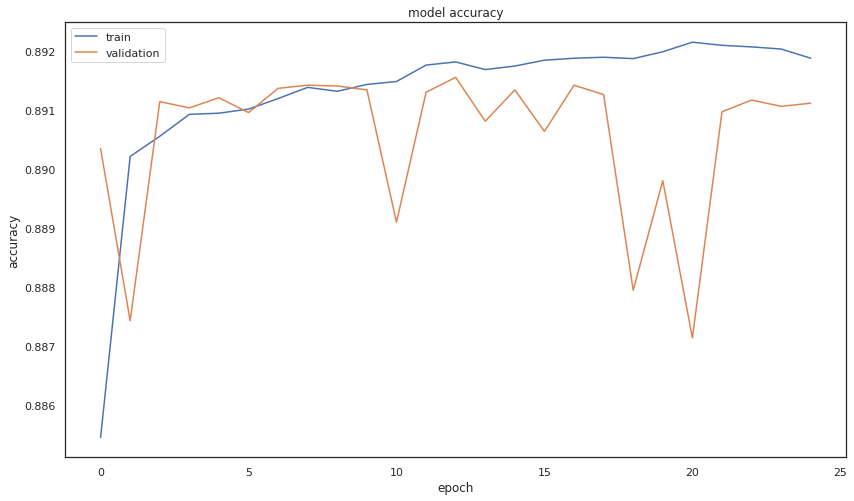

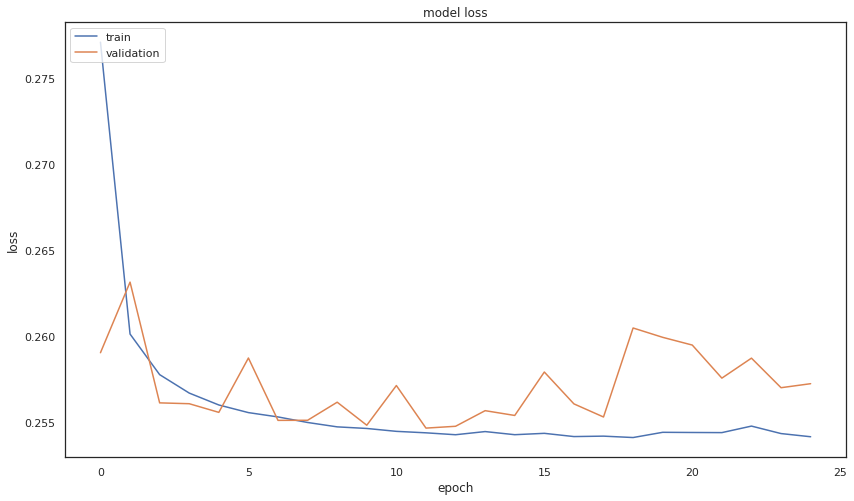

In [126]:

history = result

#  "Accuracy"
plt.figure(figsize=(14,8))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

# "Loss"
plt.figure(figsize=(14,8))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

**TASK: Create predictions from the X_test set and display a classification report and confusion matrix for the X_test set.**

In [127]:
# CODE HERE

In [128]:
prediction = model.predict_classes(X_test)

In [129]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

In [130]:
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

           0       0.96      0.46      0.62     14643
           1       0.88      1.00      0.94     60903

    accuracy                           0.89     75546
   macro avg       0.92      0.73      0.78     75546
weighted avg       0.90      0.89      0.87     75546



In [131]:
confusion_matrix(y_test, prediction)

array([[ 6670,  7973],
       [  253, 60650]])

**TASK: Given the customer below, would you offer this person a loan?**

In [140]:
import random
random.seed(101)
random_ind = random.randint(0,len(data))

new_customer = data.iloc[random_ind]
new_customer_label = data.iloc[random_ind]['loan_repaid']

new_customer = new_customer.drop(column_leakage)

In [141]:
# CODE HERE

In [142]:
single = np.array([new_customer])
single = scaler.transform(single)

single_result = model.predict(single)

**TASK: Now check, did this person actually end up paying back their loan?**

In [143]:
# CODE HERE

In [139]:
single_result[0]

array([1.], dtype=float32)

# GREAT JOB!